In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')
df = data.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.shape

(768, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df['Insulin'].value_counts()

0      374
105     11
140      9
130      9
120      8
      ... 
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [7]:
df.Age.value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

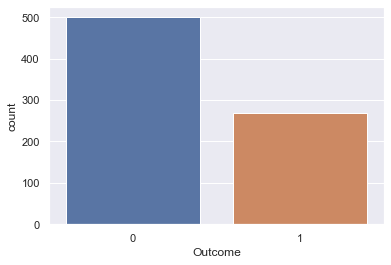

In [8]:
sns.countplot(x='Outcome', data=df);

In [9]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

almost 40% have dibaties

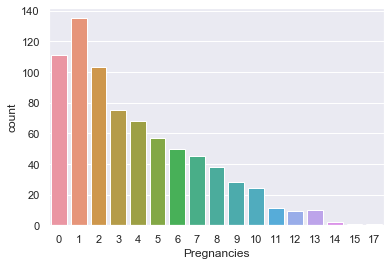

In [10]:
#Pregnancies

sns.countplot(x='Pregnancies', data=df);

most num of pregnancies is between 0 to 6

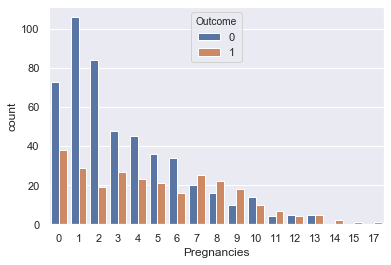

In [11]:
sns.countplot(x='Pregnancies',hue='Outcome' ,data=df);

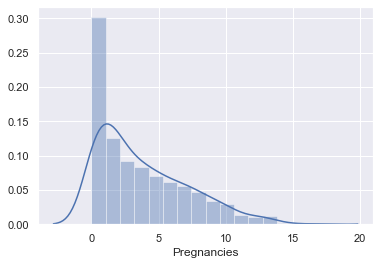

In [12]:
sns.distplot(df['Pregnancies'])

high num of pregnancies upto 5

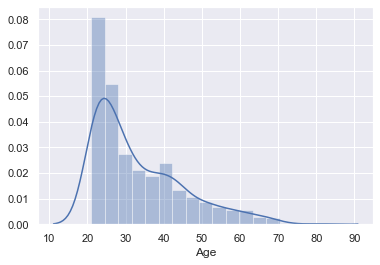

In [13]:
sns.distplot(df['Age'])

show that age of mostly people is between 20 to 40

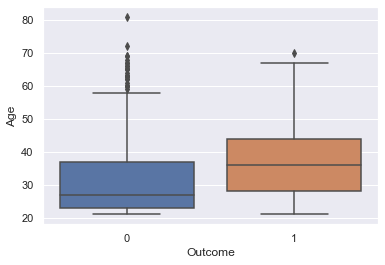

In [14]:
sns.boxplot(y='Age', x='Outcome', data=df);

show that those who have age more than 30 are more chance of dabites

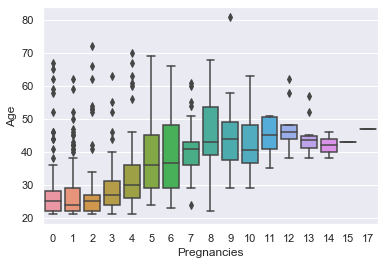

In [15]:
sns.boxplot(y='Age', x='Pregnancies', data=df);

no of Pregnancies is increses with age,<br>
*age less then 30 have max num of Pregnancies is 3 <br>
*age is increases num of Pregnancies is also increases

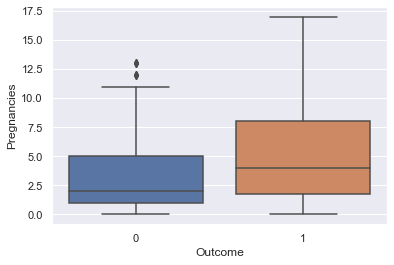

In [16]:
sns.boxplot(y='Pregnancies', x='Outcome', data=df);

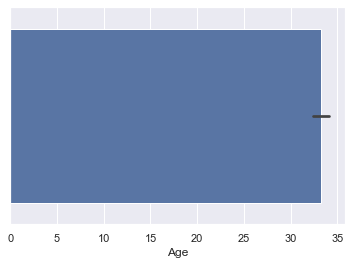

In [17]:
sns.barplot(x='Age'[:10], data=df, dodge=True);

those who Pregnancies num is between 2 to 7 are more dibates

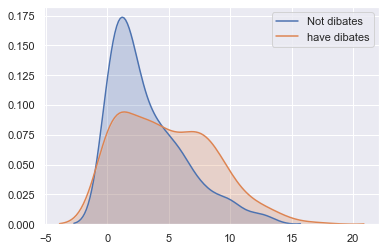

In [18]:
sns.kdeplot(df[df['Outcome']==0]['Pregnancies'].dropna(),shade=True,label='Not dibates');
sns.kdeplot(df[df['Outcome']==1]['Pregnancies'].dropna(),shade=True,label='have dibates');
    

# Some feature Engineering

In [19]:
df['Age_cat']=''
df.loc[ (df['Age'] >=20) & (df['Age'] <35), 'Age_cat'] = "young age"
df.loc[(df['Age'] >=35) & (df['Age'] <45), 'Age_cat'] = 'middle age'
df.loc[ df['Age'] >=45, 'Age_cat'] =  'elderly age'
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_cat
0,6,148,72,35,0,33.6,0.627,50,1,elderly age
1,1,85,66,29,0,26.6,0.351,31,0,young age
2,8,183,64,0,0,23.3,0.672,32,1,young age
3,1,89,66,23,94,28.1,0.167,21,0,young age
4,0,137,40,35,168,43.1,2.288,33,1,young age


In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_cat
0,6,148,72,35,0,33.6,0.627,50,1,elderly age
1,1,85,66,29,0,26.6,0.351,31,0,young age
2,8,183,64,0,0,23.3,0.672,32,1,young age
3,1,89,66,23,94,28.1,0.167,21,0,young age
4,0,137,40,35,168,43.1,2.288,33,1,young age


In [21]:
cor = df.corr()
cor.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548


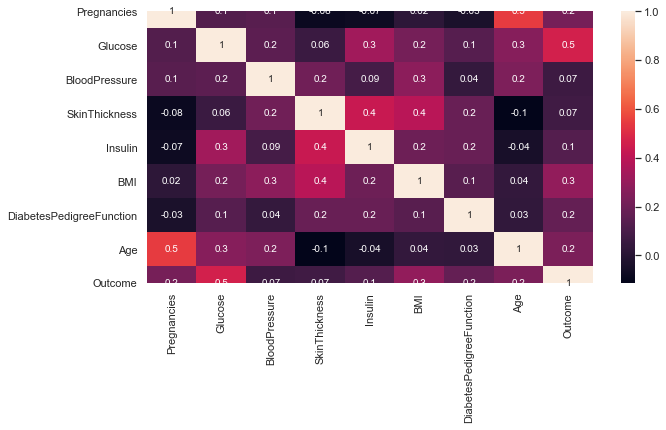

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(cor, annot=True, fmt='.1g');

# Machine Learning

In [23]:
df_OneHot=pd.get_dummies(df,columns=['Age_cat'])
df_OneHot.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_cat_elderly age,Age_cat_middle age,Age_cat_young age
0,6,148,72,35,0,33.6,0.627,50,1,1,0,0
1,1,85,66,29,0,26.6,0.351,31,0,0,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0,0,1
3,1,89,66,23,94,28.1,0.167,21,0,0,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0,0,1


In [31]:
df=df_OneHot.copy()

In [32]:
X = df.drop(['Outcome'], axis=1)
Y = df['Outcome']
print(X.shape)
print(Y.shape)

(768, 11)
(768,)


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,random_state=25, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(537, 11) (537,)
(231, 11) (231,)


In [35]:
xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_cat_elderly age,Age_cat_middle age,Age_cat_young age
584,8,124,76,24,600,28.7,0.687,52,1,0,0
237,0,179,90,27,0,44.1,0.686,23,0,0,1
715,7,187,50,33,392,33.9,0.826,34,0,0,1
758,1,106,76,0,0,37.5,0.197,26,0,0,1
189,5,139,80,35,160,31.6,0.361,25,0,0,1


#  Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr_model = LogisticRegression(random_state=25)

In [38]:
lr_model.fit(xtrain, ytrain)

C:\Users\furqa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=25, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_lr = accuracy_score(ytest,pred)
print(accuracy_lr)

0.7835497835497836


In [96]:
from sklearn.metrics import precision_score

In [97]:
precision_lr = precision_score(ytest,pred)
print(precision_lr)

0.647887323943662


In [98]:
from sklearn.metrics import recall_score

In [99]:
recall_lr = recall_score(ytest,pred)
print(recall_lr)

0.647887323943662


In [100]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       160
           1       0.65      0.65      0.65        71

    accuracy                           0.78       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.78      0.78      0.78       231



# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
clf_rf = RandomForestClassifier(random_state=100)

In [70]:
clf_rf.fit(xtrain, ytrain)

C:\Users\furqa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [71]:
rf_pred= clf_rf.predict(xtest)

In [72]:
from sklearn.metrics import precision_score

In [73]:
rf_precion=precision_score(ytest,rf_pred)
rf_precion

0.6515151515151515

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
rf_acc = accuracy_score(ytest,rf_pred)
rf_acc

0.7792207792207793

In [76]:
from sklearn.metrics import recall_score

In [77]:
rf_recall =recall_score(ytest,rf_pred)
rf_recall

0.6056338028169014

In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       160
           1       0.65      0.61      0.63        71

    accuracy                           0.78       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.78      0.78      0.78       231



#  Ada Boost

In [81]:
from sklearn.ensemble import AdaBoostClassifier

In [82]:
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)

In [83]:
pred_clf_adb=clf_adb.predict(xtest)
pred_clf_adb

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [84]:
ab_accuracy= accuracy_score(ytest,pred_clf_adb)
ab_accuracy

0.7532467532467533

In [85]:
ab_precision=precision_score(ytest,pred_clf_adb)
ab_precision

0.5972222222222222

In [86]:
ab_recall=recall_score(ytest,pred_clf_adb)
ab_recall

0.6056338028169014

In [87]:
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       160
           1       0.60      0.61      0.60        71

    accuracy                           0.75       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.75      0.75      0.75       231



In [102]:
comparison_dict={"Algorithm":["Logistic Regression","Random Forest","Ada Boost"],
                 "Accuracy":[accuracy_lr,rf_acc,ab_accuracy],
                 "Precision":[precision_lr,rf_precion,ab_precision],
                 "Recall":[recall_lr,rf_recall,ab_recall],
                   
                }

In [ ]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy'], ascending=False)

logistic Regression is best for this problem